In [4]:
import requests
from bs4 import BeautifulSoup
url = "https://results.eci.gov.in/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
state_item = soup.find('div', class_='state-item blue-bg pc-wrap')
h1_text = state_item.find('h1').text
h2_text = state_item.find('h2').text
print(f"total Seats: {h1_text}")
print(f" {h2_text}")


total Seats: 543
 Parliamentary
                    Constituencies


In [9]:
import pandas as pd
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
df = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(df)
data=pd.DataFrame(df)
excel_file="results_loksabha.xlsx"
data.to_excel(excel_file, index=True)
print("file created ")

                                                Party  Won  Leading  Total
0                        Bharatiya Janata Party - BJP  240        0    240
1                      Indian National Congress - INC   99        0     99
2                                Samajwadi Party - SP   37        0     37
3                 All India Trinamool Congress - AITC   29        0     29
4                     Dravida Munnetra Kazhagam - DMK   22        0     22
5                                  Telugu Desam - TDP   16        0     16
6                        Janata Dal  (United) - JD(U)   12        0     12
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    9        0      9
8   Nationalist Congress Party – Sharadchandra Paw...    8        0      8
9                                     Shiv Sena - SHS    7        0      7
10             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
11      Yuvajana Sramika Rythu Congress Party - YSRCP    4        0      4
12                       

# Results for Uttar Pradesh Lok Sabha

In [10]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
df = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(df)

                                    Party  Won  Leading  Total
0                    Samajwadi Party - SP   37        0     37
1            Bharatiya Janata Party - BJP   33        0     33
2          Indian National Congress - INC    6        0      6
3                 Rashtriya Lok Dal - RLD    2        0      2
4  Aazad Samaj Party (Kanshi Ram) - ASPKR    1        0      1
5              Apna Dal (Soneylal) - ADAL    1        0      1


# Results for Bihar Lok Sabha

In [11]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S04.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
df = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(df)

                                               Party  Won  Leading  Total
0                       Janata Dal  (United) - JD(U)   12        0     12
1                       Bharatiya Janata Party - BJP   12        0     12
2             Lok Janshakti Party(Ram Vilas) - LJPRV    5        0      5
3                         Rashtriya Janata Dal - RJD    4        0      4
4                     Indian National Congress - INC    3        0      3
5  Communist Party of India  (Marxist-Leninist)  ...    2        0      2
6            Hindustani Awam Morcha (Secular) - HAMS    1        0      1
7                                  Independent - IND    1        0      1


# Results for Delhi Lok Sabha

In [12]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-U05.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
df = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(df)

                          Party  Won  Leading  Total
0  Bharatiya Janata Party - BJP    7        0      7


# Lok Sabha Analysis

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("results_loksabha.xlsx")
total_seats_won = df.groupby('Party')['Won'].sum().reset_index()

In [34]:
top_5_parties = total_seats_won.sort_values(by='Won', ascending=False).head(5)
print("Top 5 parties by total seats won:")
print(top_5_parties)

Top 5 parties by total seats won:
                                  Party  Won
8          Bharatiya Janata Party - BJP  240
15       Indian National Congress - INC   99
31                 Samajwadi Party - SP   37
4   All India Trinamool Congress - AITC   29
12      Dravida Munnetra Kazhagam - DMK   22


In [35]:
total_seats = total_seats_won['Won'].sum()
df['Percentage'] = (df['Won'] / total_seats) * 100
print("Percentage of total seats won by each party:")
print(df[['Party', 'Percentage']])

Percentage of total seats won by each party:
                                                Party  Percentage
0                        Bharatiya Janata Party - BJP   44.198895
1                      Indian National Congress - INC   18.232044
2                                Samajwadi Party - SP    6.813996
3                 All India Trinamool Congress - AITC    5.340700
4                     Dravida Munnetra Kazhagam - DMK    4.051565
5                                  Telugu Desam - TDP    2.946593
6                        Janata Dal  (United) - JD(U)    2.209945
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT    1.657459
8   Nationalist Congress Party – Sharadchandra Paw...    1.473297
9                                     Shiv Sena - SHS    1.289134
10             Lok Janshakti Party(Ram Vilas) - LJPRV    0.920810
11      Yuvajana Sramika Rythu Congress Party - YSRCP    0.736648
12                         Rashtriya Janata Dal - RJD    0.736648
13       Communist Party of Ind

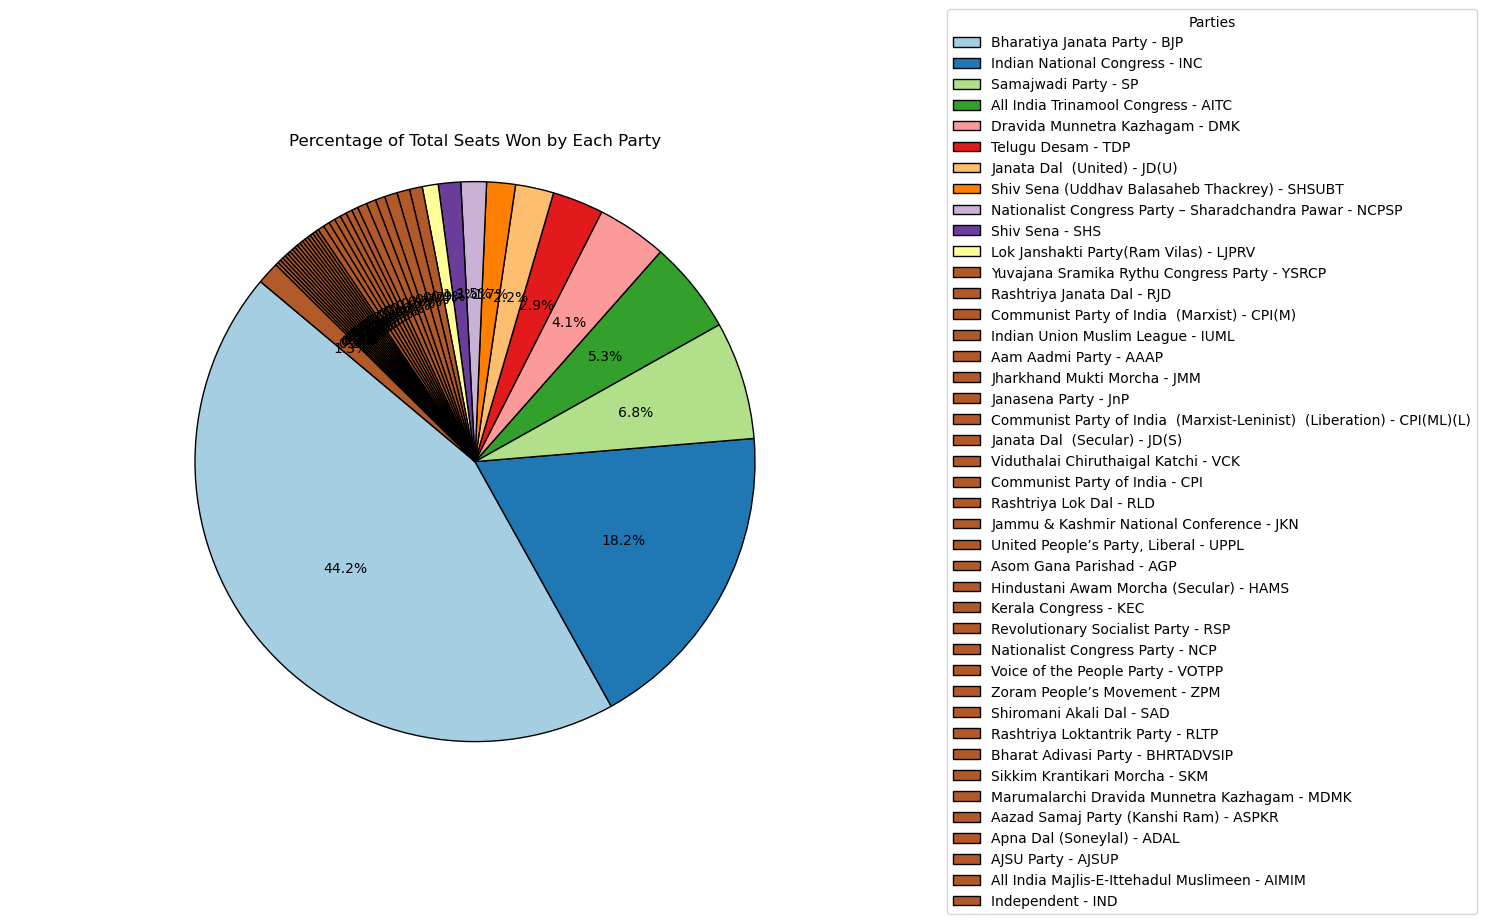

In [36]:
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(df)))
wedges, texts, autotexts = plt.pie(df['Percentage'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, df['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Total Seats Won by Each Party')
plt.axis('equal')
plt.show()

In [37]:
parties_more_than_10_seats = df[df['Won'] > 10]
print("Parties with more than 10 seats:")
print(parties_more_than_10_seats[['Party', 'Won']])

Parties with more than 10 seats:
                                 Party  Won
0         Bharatiya Janata Party - BJP  240
1       Indian National Congress - INC   99
2                 Samajwadi Party - SP   37
3  All India Trinamool Congress - AITC   29
4      Dravida Munnetra Kazhagam - DMK   22
5                   Telugu Desam - TDP   16
6         Janata Dal  (United) - JD(U)   12


In [38]:
parties_with_1_seat = df[df['Won'] == 1]
print("Parties with 1 seat:")
print(parties_with_1_seat[['Party', 'Won']])


Parties with 1 seat:
                                             Party  Won
24           United People’s Party, Liberal - UPPL    1
25                        Asom Gana Parishad - AGP    1
26         Hindustani Awam Morcha (Secular) - HAMS    1
27                           Kerala Congress - KEC    1
28             Revolutionary Socialist Party - RSP    1
29                Nationalist Congress Party - NCP    1
30               Voice of the People Party - VOTPP    1
31                   Zoram People’s Movement - ZPM    1
32                       Shiromani Akali Dal - SAD    1
33               Rashtriya Loktantrik Party - RLTP    1
34               Bharat Adivasi Party - BHRTADVSIP    1
35                  Sikkim Krantikari Morcha - SKM    1
36   Marumalarchi Dravida Munnetra Kazhagam - MDMK    1
37          Aazad Samaj Party (Kanshi Ram) - ASPKR    1
38                      Apna Dal (Soneylal) - ADAL    1
39                              AJSU Party - AJSUP    1
40  All India Majlis-E-Itte

In [39]:
total_parties = df['Party'].nunique()
print("Total number of parties participated:", total_parties)

Total number of parties participated: 42


In [40]:
average_seats_won = df['Won'].mean()
print("Average number of seats won per party:", average_seats_won)

Average number of seats won per party: 12.928571428571429


In [41]:
party_max_seats = df[df['Won'] == df['Won'].max()]
print("Party with maximum seats won:")
print(party_max_seats[['Party', 'Won']])

Party with maximum seats won:
                          Party  Won
0  Bharatiya Janata Party - BJP  240


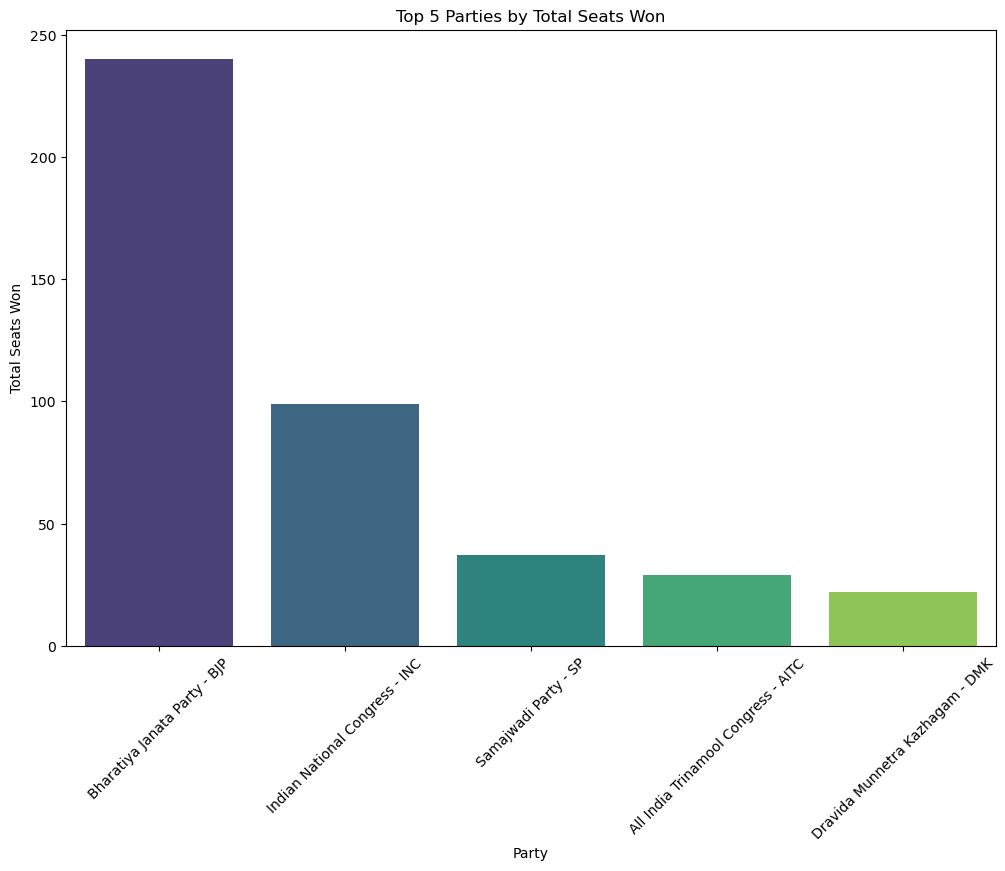

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Won', data=top_5_parties, palette='viridis')
plt.title('Top 5 Parties by Total Seats Won')
plt.xlabel('Party')
plt.ylabel('Total Seats Won')
plt.xticks(rotation=45)
plt.show()

In [43]:
party_min_seats = df[df['Won'] == df['Won'].min()]
print("Party with minimum seats won:")
print(party_min_seats[['Party', 'Won']])

Party with minimum seats won:
                                             Party  Won
24           United People’s Party, Liberal - UPPL    1
25                        Asom Gana Parishad - AGP    1
26         Hindustani Awam Morcha (Secular) - HAMS    1
27                           Kerala Congress - KEC    1
28             Revolutionary Socialist Party - RSP    1
29                Nationalist Congress Party - NCP    1
30               Voice of the People Party - VOTPP    1
31                   Zoram People’s Movement - ZPM    1
32                       Shiromani Akali Dal - SAD    1
33               Rashtriya Loktantrik Party - RLTP    1
34               Bharat Adivasi Party - BHRTADVSIP    1
35                  Sikkim Krantikari Morcha - SKM    1
36   Marumalarchi Dravida Munnetra Kazhagam - MDMK    1
37          Aazad Samaj Party (Kanshi Ram) - ASPKR    1
38                      Apna Dal (Soneylal) - ADAL    1
39                              AJSU Party - AJSUP    1
40  All India Majl

In [44]:
other_parties_seats = df[df['Won'] <= 5]['Won'].sum()
print("\nSum of seats won by other parties (<=5 seats):", other_parties_seats)


Sum of seats won by other parties (<=5 seats): 57


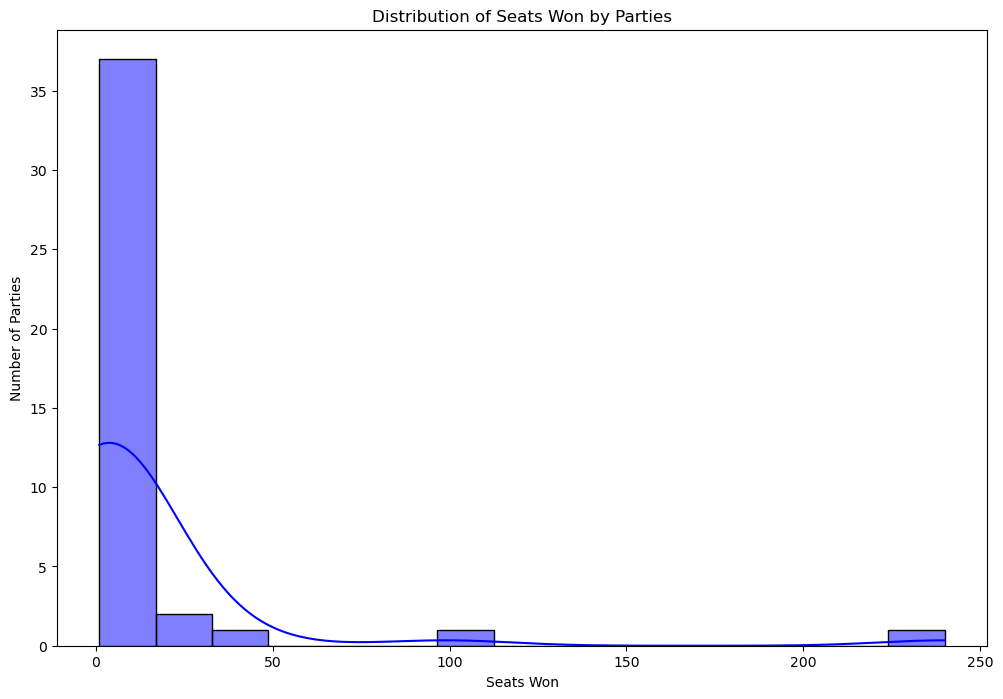

In [45]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Won'], kde=True, bins=15, color='blue')
plt.title('Distribution of Seats Won by Parties')
plt.xlabel('Seats Won')
plt.ylabel('Number of Parties')
plt.show()

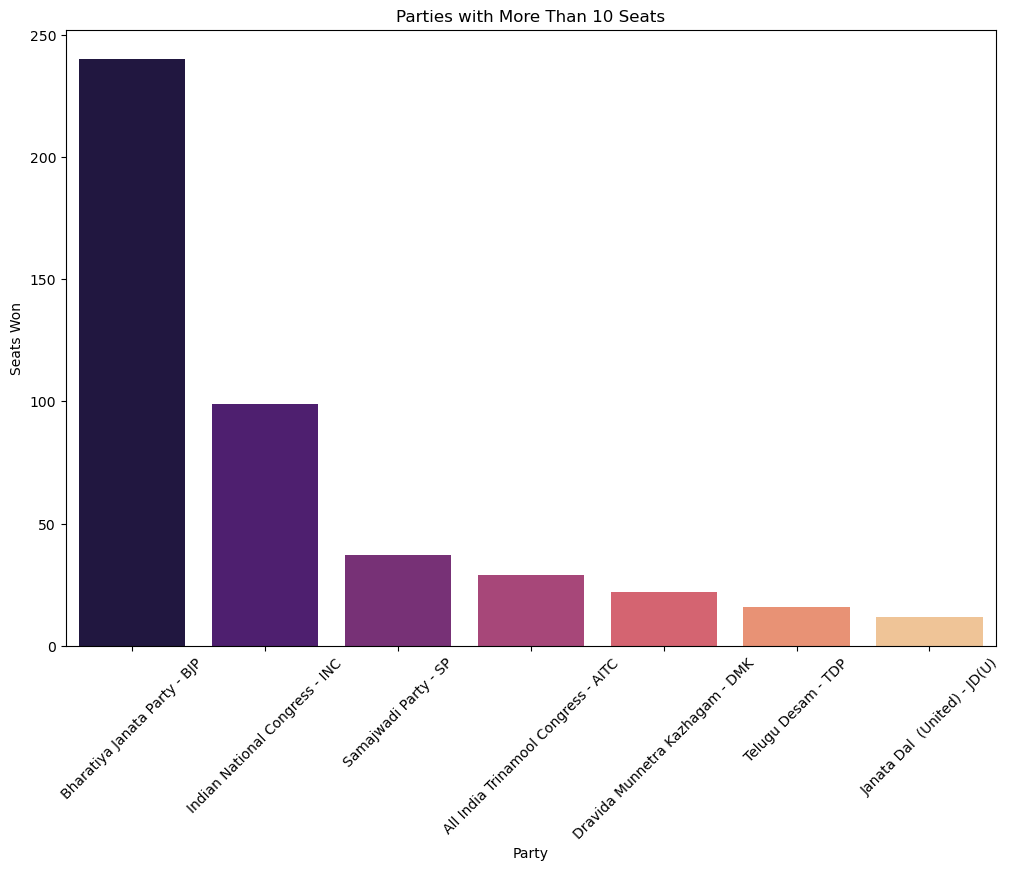

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Party', y='Won', data=parties_more_than_10_seats, palette='magma')
plt.title('Parties with More Than 10 Seats')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=45)
plt.show()

# UP Analysis

In [62]:
import requests
from bs4 import BeautifulSoup
url = 'https://results.eci.gov.in/PcResultGenJune2024/partywiseresult-S24.htm'  
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
parties = []
won = []
leading = []
total = []
for row in table.find_all('tr')[1:-1]:  
    cols = row.find_all('td')
    parties.append(cols[0].text.strip())
    won.append(int(cols[1].text.strip()))
    leading.append(int(cols[2].text.strip()))
    total.append(int(cols[3].text.strip()))
data = pd.DataFrame({
    'Party': parties,
    'Won': won,
    'Leading': leading,
    'Total': total
})
print(data)
data=pd.DataFrame(df)
excel_file="results_loksabha_UP.xlsx"
data.to_excel(excel_file, index=True)
print("file created ")

                                    Party  Won  Leading  Total
0                    Samajwadi Party - SP   37        0     37
1            Bharatiya Janata Party - BJP   33        0     33
2          Indian National Congress - INC    6        0      6
3                 Rashtriya Lok Dal - RLD    2        0      2
4  Aazad Samaj Party (Kanshi Ram) - ASPKR    1        0      1
5              Apna Dal (Soneylal) - ADAL    1        0      1
file created 


In [70]:
data = pd.read_excel("results_loksabha_UP.xlsx")
data=pd.DataFrame(data)
data

,Unnamed: 0,Party,Won,Leading,Total,Percentage
0,0,Samajwadi Party - SP,37,0,37,46.25
1,1,Bharatiya Janata Party - BJP,33,0,33,41.25
2,2,Indian National Congress - INC,6,0,6,7.50
3,3,Rashtriya Lok Dal - RLD,2,0,2,2.50
4,4,Aazad Samaj Party (Kanshi Ram) - ASPKR,1,0,1,1.25
5,5,Apna Dal (Soneylal) - ADAL,1,0,1,1.25


In [71]:
total_seats = 80
data['Percentage'] = (data['Won'] / total_seats) * 100
print("Percentage of total seats won by each party:")
print(data[['Party', 'Percentage']])

Percentage of total seats won by each party:
                                    Party  Percentage
0                    Samajwadi Party - SP       46.25
1            Bharatiya Janata Party - BJP       41.25
2          Indian National Congress - INC        7.50
3                 Rashtriya Lok Dal - RLD        2.50
4  Aazad Samaj Party (Kanshi Ram) - ASPKR        1.25
5              Apna Dal (Soneylal) - ADAL        1.25


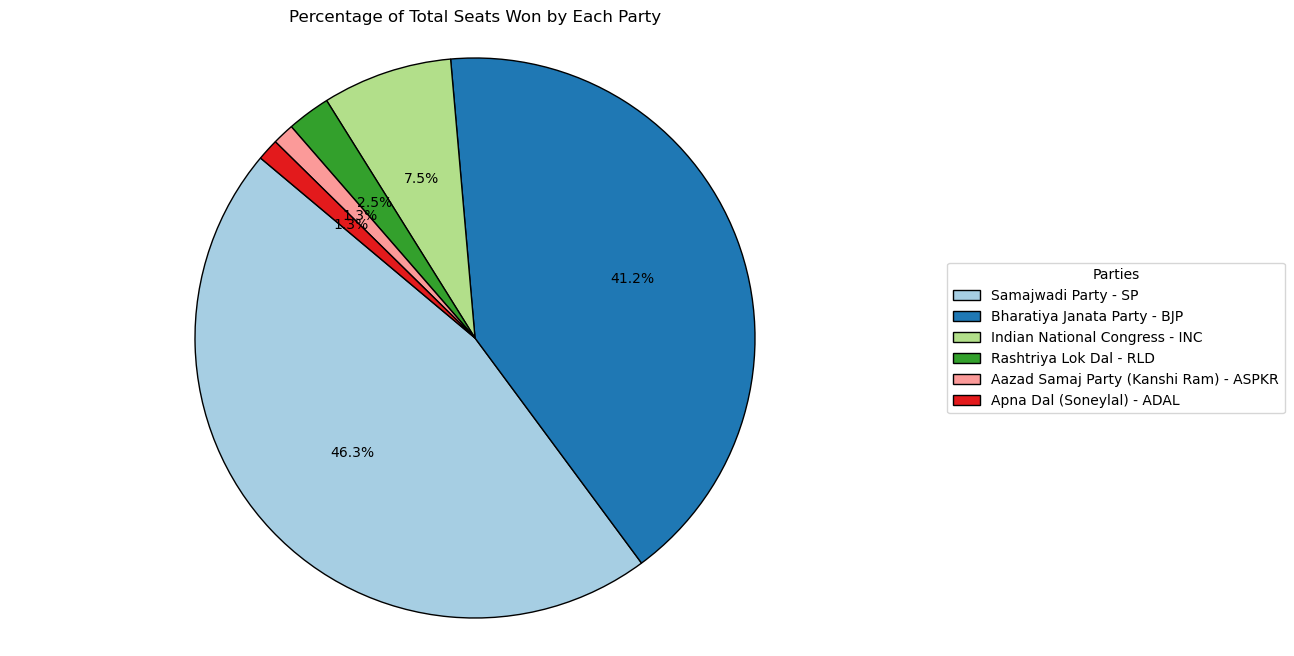

In [96]:
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(range(len(data)))
wedges, texts, autotexts = plt.pie(data['Percentage'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.legend(wedges, data['Party'], title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Percentage of Total Seats Won by Each Party')
plt.axis('equal')
plt.show()

Similarly we can get analysis for various other states and union teritories of India.
Here i have analyzed Lok Sabha Election data for some of the various states and union teritories.
We can also analyze more data for from https://results.eci.gov.in/